In [3]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [5]:
train = pd.read_csv('./data/house_train.csv')
test = pd.read_csv('./data/house_test.csv')

In [7]:
train.shape, test.shape

((15035, 21), (6555, 20))

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15035 entries, 0 to 15034
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             15035 non-null  int64  
 1   date           15035 non-null  object 
 2   price          15035 non-null  float64
 3   bedrooms       15035 non-null  int64  
 4   bathrooms      15035 non-null  float64
 5   sqft_living    15035 non-null  int64  
 6   sqft_lot       15035 non-null  int64  
 7   floors         15035 non-null  float64
 8   waterfront     15035 non-null  int64  
 9   view           15035 non-null  int64  
 10  condition      15035 non-null  int64  
 11  grade          15035 non-null  int64  
 12  sqft_above     15035 non-null  int64  
 13  sqft_basement  15035 non-null  int64  
 14  yr_built       15035 non-null  int64  
 15  yr_renovated   15035 non-null  int64  
 16  zipcode        15035 non-null  int64  
 17  lat            15035 non-null  float64
 18  long  

In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6555 entries, 0 to 6554
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             6555 non-null   int64  
 1   date           6555 non-null   object 
 2   bedrooms       6555 non-null   int64  
 3   bathrooms      6555 non-null   float64
 4   sqft_living    6555 non-null   int64  
 5   sqft_lot       6555 non-null   int64  
 6   floors         6555 non-null   float64
 7   waterfront     6555 non-null   int64  
 8   view           6555 non-null   int64  
 9   condition      6555 non-null   int64  
 10  grade          6555 non-null   int64  
 11  sqft_above     6555 non-null   int64  
 12  sqft_basement  6555 non-null   int64  
 13  yr_built       6555 non-null   int64  
 14  yr_renovated   6555 non-null   int64  
 15  zipcode        6555 non-null   int64  
 16  lat            6555 non-null   float64
 17  long           6555 non-null   float64
 18  sqft_liv

In [10]:
train.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,15035.000000,1.503500e+04,15035.000000,15035.000000,15035.000000,1.503500e+04,15035.000000,15035.000000,15035.000000,15035.000000,15035.000000,15035.000000,15035.000000,15035.000000,15035.000000,15035.000000,15035.000000,15035.000000,15035.000000,15035.000000
mean,7517.000000,5.406827e+05,3.369139,2.115065,2083.790223,1.529697e+04,1.498071,0.007117,0.234253,3.406651,7.660725,1794.158164,289.632059,1971.100432,83.798936,98078.031726,47.560721,-122.213677,1992.754772,12823.884935
std,4340.374984,3.715247e+05,0.902721,0.767519,922.134087,4.261282e+04,0.538522,0.084063,0.763376,0.646505,1.179803,831.738609,440.663284,29.407612,400.398498,53.297815,0.138164,0.141294,691.456442,27736.259787
min,0.000000,7.800000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3758.500000,3.220000e+05,3.000000,1.750000,1430.000000,5.027500e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.472700,-122.328000,1490.000000,5100.000000
50%,7517.000000,4.500000e+05,3.000000,2.250000,1910.000000,7.620000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1570.000000,0.000000,1975.000000,0.000000,98065.000000,47.571900,-122.231000,1850.000000,7610.000000
75%,11275.500000,6.450000e+05,4.000000,2.500000,2560.000000,1.069550e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2230.000000,550.000000,1997.000000,0.000000,98117.000000,47.678300,-122.126000,2360.000000,10076.000000
max,15034.000000,7.700000e+06,10.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4130.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [11]:
train.head(20)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2,2,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
3,3,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
4,4,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
5,5,20150403T000000,662500.0,3,2.50,3560,9796,1.0,0,0,...,8,1860,1700,1965,0,98007,47.6007,-122.145,2210,8925
6,6,20140527T000000,468000.0,2,1.00,1160,6000,1.0,0,0,...,7,860,300,1942,0,98115,47.6900,-122.292,1330,6000
7,7,20140528T000000,310000.0,3,1.00,1430,19901,1.5,0,0,...,7,1430,0,1927,0,98028,47.7558,-122.229,1780,12697
8,8,20141007T000000,400000.0,3,1.75,1370,9680,1.0,0,0,...,7,1370,0,1977,0,98074,47.6127,-122.045,1370,10208
9,9,20150312T000000,530000.0,5,2.00,1810,4850,1.5,0,0,...,7,1810,0,1900,0,98107,47.6700,-122.394,1360,4850


(array([1.3258e+04, 1.4770e+03, 2.1000e+02, 6.4000e+01, 1.8000e+01,
        1.0000e+00, 3.0000e+00, 1.0000e+00, 1.0000e+00, 2.0000e+00]),
 array([  78000.,  840200., 1602400., 2364600., 3126800., 3889000.,
        4651200., 5413400., 6175600., 6937800., 7700000.]),
 <BarContainer object of 10 artists>)

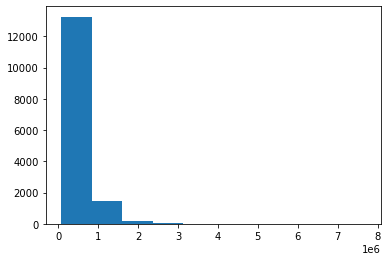

In [12]:
plt.hist(train.price)

In [14]:
print( train['bedrooms'].unique(), test['bedrooms'].unique(),
      end='\n\n' )
print( train['bathrooms'].unique(), test['bathrooms'].unique(),
      end='\n\n' )
print("집의 층수 : \n", train['floors'].unique(), test['floors'].unique(),
      end='\n\n' )
print("집의 전방에 강이 흐르는지 유무 : \n", 
      train['waterfront'].unique(), test['waterfront'].unique(), end='\n\n' )

[ 3  2  5  4  6  1  7  9  8  0 10] [4 3 2 5 6 1 0 7 8 9]

[1.   2.   2.25 1.5  2.5  1.75 3.   2.75 3.25 4.   3.5  0.75 4.75 5.
 4.25 4.5  3.75 5.25 6.   1.25 0.5  5.5  6.75 5.75 0.   8.   7.5  7.75
 6.25] [4.5  2.5  3.   1.   1.75 2.   2.25 3.25 4.   1.5  3.5  2.75 0.75 5.
 4.25 0.   1.25 3.75 4.75 5.5  5.25 6.   0.5  6.5 ]

집의 층수 : 
 [1.  2.  1.5 3.  2.5 3.5] [1.  2.  1.5 3.  2.5 3.5]

집의 전방에 강이 흐르는지 유무 : 
 [0 1] [0 1]



In [15]:
X_all = train.drop(['price'], axis=1)
y = train['price']

In [17]:
sel = ['condition', 'floors', 'lat', 'long']
X = X_all[sel]
y = train['price']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [20]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [21]:
knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)

In [22]:
knn.score(X_test, y_test)

0.4684087750088025

In [23]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
pred = lr_model.predict(X_test)

print(lr_model.score(X_test, y_test))

0.18561260970671123


In [24]:
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
pred = rf_model.predict(X_test)

print(rf_model.score(X_test, y_test))

0.6061678793761897


In [25]:
mse_val =  ( (pred - y_test) ** 2 ).sum() / len(pred)
print( mse_val )  # mse
print( mse_val ** 0.5 )   # rmse

48840397440.96077
220998.63674005042
